# Step 1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load the Dataset


In [ ]:
file_path = '/content/HR_Analytics_GROUP_2.csv'
df = pd.read_csv(file_path)

# Step 3: Initial Exploration


In [ ]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [ ]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Step 4: Descriptive Analytics



In [ ]:
# 4.1 Average turnover rate by department
# Converting 'Attrition' column to numerical (0 for No, 1 for Yes)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Now calculate the average turnover rate by department
turnover_rate = df.groupby('Department')['Attrition'].mean()
print("Average Turnover Rate by Department:\n", turnover_rate)

Average Turnover Rate by Department:
 Department
Human Resources           0.190476
Research & Development    0.137539
Sales                     0.206667
Name: Attrition, dtype: float64


In [ ]:
# 4.2 Average performance ratings by department
performance_rating = df.groupby('Department')['PerformanceRating'].mean()
print("\nAverage Performance Rating by Department:\n", performance_rating)


Average Performance Rating by Department:
 Department
Human Resources           3.142857
Research & Development    3.162358
Sales                     3.135556
Name: PerformanceRating, dtype: float64


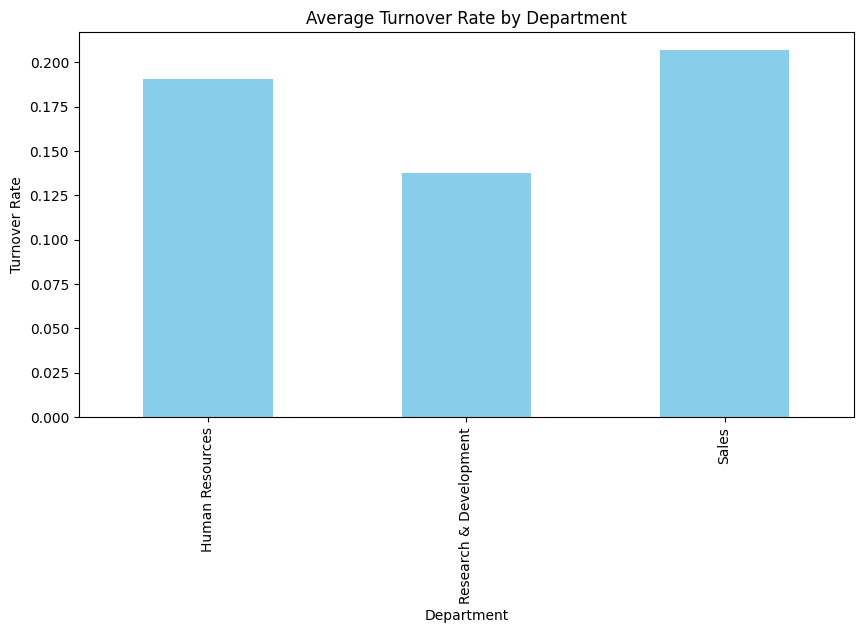

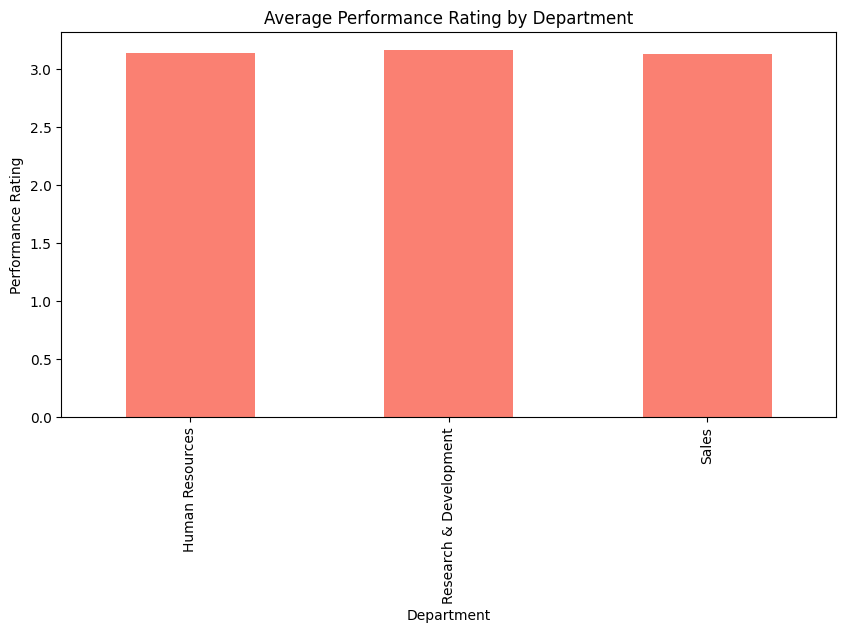

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
turnover_rate.plot(kind='bar', color='skyblue', title='Average Turnover Rate by Department')
plt.ylabel('Turnover Rate')
plt.show()
plt.figure(figsize=(10, 5))
performance_rating.plot(kind='bar', color='salmon', title='Average Performance Rating by Department')
plt.ylabel('Performance Rating')
plt.show()

Departments with higher turnover rates may indicate areas where HR could focus retention strategies.
For example, if "Sales" has high turnover, HR could investigate role satisfaction, workload, or compensation.


# Step 5: Data Preprocessing for Predictive Analytics


In [ ]:
# Label encode Attrition (target variable)
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Split dataset into training and testing sets
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Predictive Analytics - Model Building


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       373
           1       1.00      0.07      0.13        71

    accuracy                           0.85       444
   macro avg       0.92      0.54      0.53       444
weighted avg       0.87      0.85      0.79       444

Confusion Matrix:
 [[373   0]
 [ 66   5]]


# Step 7: Analyze Correlation between Engagement and Performance
italicized text

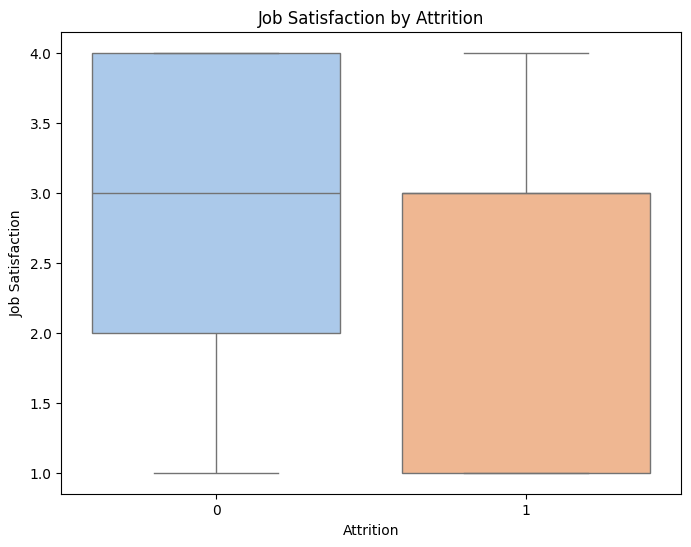

In [ ]:
# Assuming 'JobSatisfaction' and 'PerformanceRating' are part of the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='pastel')
plt.title('Job Satisfaction by Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

Insight:
If Job Satisfaction is lower for employees who left, this highlights the importance of engagement in retention.
Strategies could involve employee engagement programs, mentorship, or recognition initiatives.


# Step 8: Recruitment Data Patterns (e.g., Age and Hiring Source Influence on Attrition)


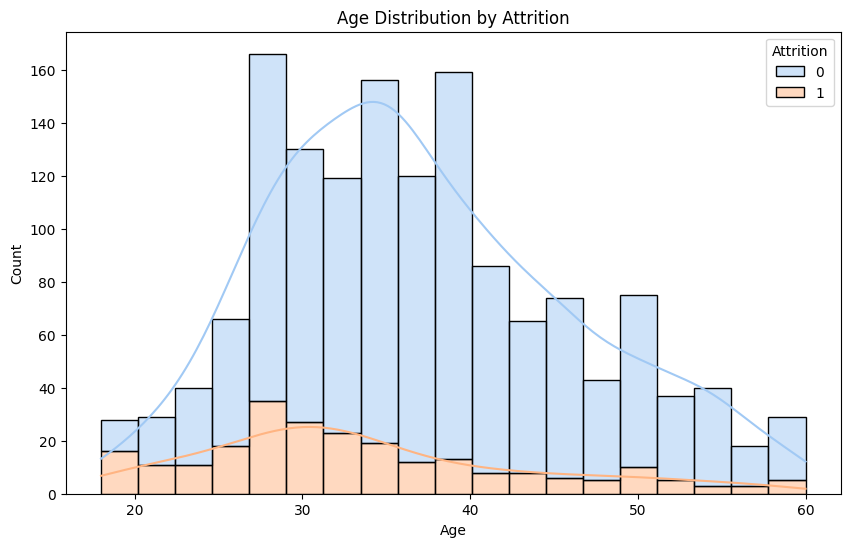

In [ ]:
# Plot Age by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", palette="pastel", kde=True)
plt.title('Age Distribution by Attrition')
plt.show()

Insight:
If younger employees show higher attrition, HR could develop targeted onboarding or career development plans.
This can make roles more attractive and align with long-term career progression.

# Step 9: Feature Importance (Insights for Prescriptive Analytics)


In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importances.head(10))


Top 10 Important Features:
 Age                     0.040625
MonthlyIncome           0.039290
EmployeeNumber          0.034288
OverTime_Yes            0.033874
TotalWorkingYears       0.032628
DailyRate               0.031478
MonthlyRate             0.031086
YearsAtCompany          0.030828
DistanceFromHome        0.029940
YearsWithCurrManager    0.029612
dtype: float64


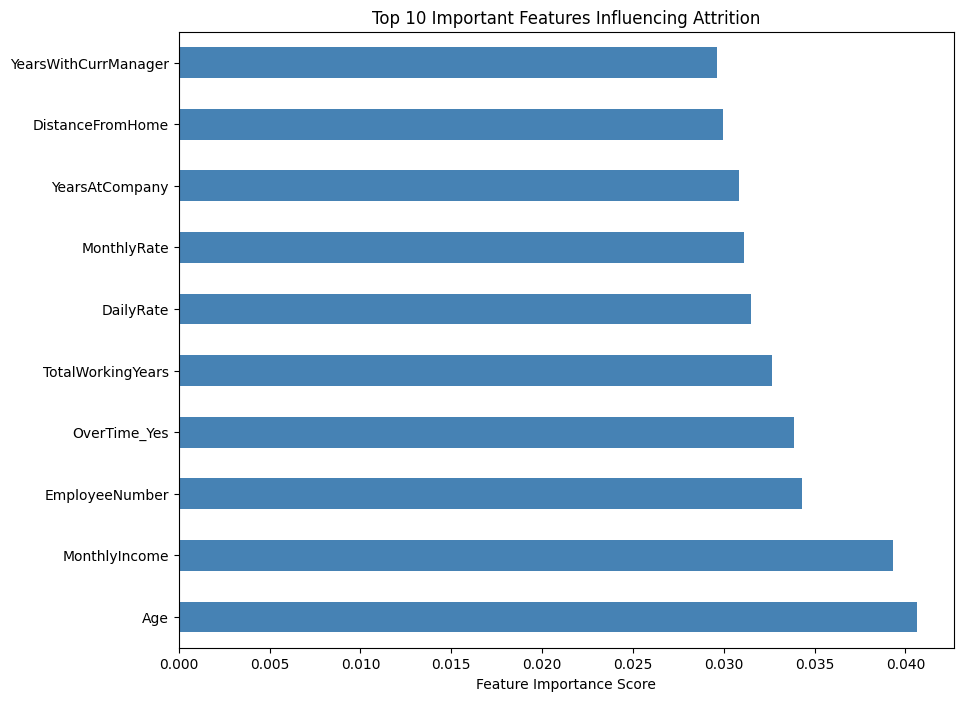

In [ ]:
# Visualize Feature Importances
plt.figure(figsize=(10, 8))
feature_importances.head(10).plot(kind='barh', color='steelblue')
plt.title('Top 10 Important Features Influencing Attrition')
plt.xlabel('Feature Importance Score')
plt.show()

# Step 10: Prescriptive Analytics - Recommendations


In [ ]:
# Based on top features, provide recommendations for HR strategies
print("Prescriptive Recommendations:\n")
if 'OverTime_Yes' in feature_importances.head(10):
    print("- High attrition rates are associated with overtime. Consider reducing overtime to retain employees.")
if 'JobSatisfaction' in feature_importances.head(10):
    print("- Job satisfaction is a critical factor. Implement programs to enhance job satisfaction.")
if 'MonthlyIncome' in feature_importances.head(10):
    print("- Low income correlates with higher attrition. Consider revising compensation structures.")

Prescriptive Recommendations:

- High attrition rates are associated with overtime. Consider reducing overtime to retain employees.
- Low income correlates with higher attrition. Consider revising compensation structures.
